In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
teis_df = pd.read_excel('../data/TEIS_Referral_Data_for_NSS_Compiled_Monthly.xlsx')
teis_df

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification/ Referral Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1,2016,1,NaN,NaN,2017-08-09,NaN,1,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2016-07-31,1.0,1,Qtr 1,NaN
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1,2016,1,NaN,NaN,2018-12-06,NaN,1,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1,2016,1,NaN,NaN,2018-04-18,NaN,1,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,1,2021,1,NaN,NaN,2024-04-07,NaN,4,Qtr 4,NaN
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,1,2021,1,NaN,NaN,2025-03-13,NaN,4,Qtr 4,NaN
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,1,2021,1,NaN,NaN,2025-01-05,NaN,4,Qtr 4,NaN
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,1,2021,1,NaN,NaN,2023-09-12,NaN,4,Qtr 4,NaN


In [4]:
teis_df = teis_df.rename(columns = {'Child ID' : 'child_id', 'Fiscal Year.1' : 'fiscal_year1', 'Notification/ Referral Date': 'referral_date', 'County SES': 'county_ses', 'Referral Source Type Name': 'referral_source', 'Initial Eligibility Date':'success_date'})
teis_df

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1,2016,1,NaN,NaN,2017-08-09,NaN,1,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2016-07-31,1.0,1,Qtr 1,NaN
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1,2016,1,NaN,NaN,2018-12-06,NaN,1,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1,2016,1,NaN,NaN,2018-04-18,NaN,1,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,1,2021,1,NaN,NaN,2024-04-07,NaN,4,Qtr 4,NaN
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,1,2021,1,NaN,NaN,2025-03-13,NaN,4,Qtr 4,NaN
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,1,2021,1,NaN,NaN,2025-01-05,NaN,4,Qtr 4,NaN
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,1,2021,1,NaN,NaN,2023-09-12,NaN,4,Qtr 4,NaN


In [5]:
dups_df = teis_df.loc[teis_df.duplicated(subset = 'child_id', keep = False)]
dups_df

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
6,GN,404087,2014-10-29,Davidson,Competitive,Notification,I,Mary Jane Ratliff,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2017-10-29,NaN,1,Qtr 1,NaN
7,GN,402274,2015-12-10,Montgomery,Transitional,Eligibility,I,Tina Regenwether,2016-07-01,2016-07-07,...,1,2016,1,NaN,NaN,2018-12-10,NaN,1,Qtr 1,NaN
11,MD,404074,2016-05-23,Shelby,Transitional,Notification,I,Helen Shipp,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2019-05-23,NaN,1,Qtr 1,NaN
14,MD,404081,2016-04-23,Shelby,Transitional,Notification,I,JoAnn Hinkle-DA,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2019-04-23,NaN,1,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113225,UC,508343,2021-06-14,Putnam,Transitional,Eligibility,A,A.J. Cowan,2022-05-25,NaT,...,1,2021,1,NaN,NaN,2024-06-14,NaN,4,Qtr 4,NaN
113235,UC,512956,2019-10-17,Sumner,Competitive,Eligibility,A,Taylor Lee,2022-05-09,2022-05-27,...,1,2021,1,NaN,NaN,2022-10-17,NaN,4,Qtr 4,NaN
113241,UC,497416,2021-01-08,Warren,At-Risk,Notification,I,Sherry Roberts-DS,2022-05-10,NaT,...,1,2021,1,NaN,NaN,2024-01-08,NaN,4,Qtr 4,NaN
113246,UC,527351,2021-07-08,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-10,2022-05-17,...,1,2021,1,NaN,NaN,2024-07-08,NaN,4,Qtr 4,NaN


In [6]:
dups_df.sort_values('child_id')

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
8326,ET,360966,2014-01-18,Monroe,At-Risk,Notification,I,Cassidy Wilbanks,2017-01-12,NaT,...,1,2016,1,NaN,NaN,2017-01-18,1.0,3,Qtr 3,NaN
6007,ET,360966,2014-01-18,Monroe,At-Risk,Notification,I,Leslie Milligan,2016-11-10,NaT,...,1,2016,1,NaN,NaN,2017-01-18,1.0,2,Qtr 2,NaN
5441,ET,361021,2014-02-17,Anderson,Transitional,Notification,A,Cathy Taylor,2016-10-28,NaT,...,1,2016,1,NaN,NaN,2017-02-17,NaN,2,Qtr 2,NaN
6658,ET,361021,2014-02-17,Anderson,Transitional,IFSP,A,Cathy Taylor,2016-11-29,2016-11-29,...,1,2016,1,NaN,NaN,2017-02-17,1.0,2,Qtr 2,NaN
5189,GN,361038,2013-12-25,Wilson,Competitive,Eligibility,A,Patricia Lyle,2016-10-24,NaT,...,1,2016,1,NaN,NaN,2016-12-25,1.0,2,Qtr 2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111573,ET,527636,2020-05-01,Blount,Transitional,Eligibility,I,Signal Centers-EEA,2022-05-27,2022-05-27,...,1,2021,1,NaN,NaN,2023-05-01,NaN,4,Qtr 4,NaN
110585,MD,527691,2021-12-23,Shelby,Transitional,Notification,A,Jasmine Douglass,2022-04-28,NaT,...,1,2021,1,NaN,NaN,2024-12-23,NaN,4,Qtr 4,NaN
112414,MD,527691,2021-12-23,Shelby,Transitional,Notification,A,Jasmine Douglass,2022-05-20,NaT,...,1,2021,1,NaN,NaN,2024-12-23,NaN,4,Qtr 4,NaN
111752,FT,527751,2021-10-23,Sullivan,Transitional,Notification,I,Rebecca Fletcher - Admin,2022-05-17,NaT,...,1,2021,1,NaN,NaN,2024-10-23,NaN,4,Qtr 4,NaN


In [7]:
dups_df = dups_df.sort_values('fiscal_year1')
dups_df

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
11404,GN,415939,2017-02-26,Montgomery,Transitional,Notification,I,Carla Thomas-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2020-02-26,NaN,3,Qtr 3,NaN
11405,GN,415937,2017-02-26,Montgomery,Transitional,Notification,I,Carla Thomas-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2020-02-26,NaN,3,Qtr 3,NaN
11406,GN,415962,2014-08-08,Davidson,Competitive,Notification,I,Angela Sorrells-SC,2017-03-16,NaT,...,1,2016,1,NaN,NaN,2017-08-08,NaN,3,Qtr 3,NaN
11410,MD,409254,2016-06-16,Shelby,Transitional,Evaluation,A,Cheryl Sanders,2017-03-16,2017-03-16,...,1,2016,1,NaN,NaN,2019-06-16,NaN,3,Qtr 3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99389,ET,480085,2019-11-22,Anderson,Transitional,Eligibility,A,Rose DuPont,2021-10-19,2021-10-26,...,1,2021,1,NaN,NaN,2022-11-22,NaN,2,Qtr 2,NaN
99379,ET,507238,2021-03-09,Campbell,At-Risk,Notification,I,Jennifer Nicely,2021-10-27,NaT,...,1,2021,1,NaN,NaN,2024-03-09,NaN,2,Qtr 2,NaN
99374,ET,480885,2019-08-02,Jefferson,Transitional,Eligibility,A,Elizabeth Mounts,2021-10-25,2021-10-29,...,1,2021,1,NaN,NaN,2022-08-02,NaN,2,Qtr 2,NaN
99369,ET,482902,2019-08-14,Blount,Transitional,IFSP,A,Leslie Milligan,2021-10-12,2021-10-12,...,1,2021,1,NaN,NaN,2022-08-14,NaN,2,Qtr 2,NaN


In [8]:
dups_count_df = dups_df.loc[dups_df.duplicated(subset = 'child_id', keep = 'first')]
dups_count_df

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
12210,ET,415538,2016-09-27,Grainger,At-Risk,Notification,I,Wendy Burton,2017-04-03,NaT,...,1,2016,1,NaN,NaN,2019-09-27,NaN,4,Qtr 4,NaN
12604,GN,415753,2016-03-05,Wilson,Competitive,Notification,I,Rebecca Boshers-SC,2017-04-11,NaT,...,1,2016,1,NaN,NaN,2019-03-05,NaN,4,Qtr 4,NaN
12611,MD,415854,2017-01-04,Shelby,Transitional,Screening,I,Karen Jack,2017-04-11,NaT,...,1,2016,1,NaN,NaN,2020-01-04,NaN,4,Qtr 4,NaN
12617,MD,415702,2016-12-28,Shelby,Transitional,Evaluation,A,Elizabeth Smith,2017-04-11,2017-04-11,...,1,2016,1,NaN,NaN,2019-12-28,NaN,4,Qtr 4,NaN
12646,SW,400741,2016-03-23,Madison,Transitional,Notification,I,Jenny Patterson,2017-04-11,NaT,...,1,2016,1,NaN,NaN,2019-03-23,NaN,4,Qtr 4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99389,ET,480085,2019-11-22,Anderson,Transitional,Eligibility,A,Rose DuPont,2021-10-19,2021-10-26,...,1,2021,1,NaN,NaN,2022-11-22,NaN,2,Qtr 2,NaN
99379,ET,507238,2021-03-09,Campbell,At-Risk,Notification,I,Jennifer Nicely,2021-10-27,NaT,...,1,2021,1,NaN,NaN,2024-03-09,NaN,2,Qtr 2,NaN
99374,ET,480885,2019-08-02,Jefferson,Transitional,Eligibility,A,Elizabeth Mounts,2021-10-25,2021-10-29,...,1,2021,1,NaN,NaN,2022-08-02,NaN,2,Qtr 2,NaN
99369,ET,482902,2019-08-14,Blount,Transitional,IFSP,A,Leslie Milligan,2021-10-12,2021-10-12,...,1,2021,1,NaN,NaN,2022-08-14,NaN,2,Qtr 2,NaN


In [9]:
teis_count_df = teis_df.drop_duplicates(['child_id'])
teis_count_df

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1,2016,1,NaN,NaN,2017-08-09,NaN,1,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2016-07-31,1.0,1,Qtr 1,NaN
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1,2016,1,NaN,NaN,2018-12-06,NaN,1,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1,2016,1,NaN,NaN,2018-04-18,NaN,1,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,1,2021,1,NaN,NaN,2024-04-07,NaN,4,Qtr 4,NaN
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,1,2021,1,NaN,NaN,2025-03-13,NaN,4,Qtr 4,NaN
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,1,2021,1,NaN,NaN,2025-01-05,NaN,4,Qtr 4,NaN
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,1,2021,1,NaN,NaN,2023-09-12,NaN,4,Qtr 4,NaN


In [10]:
dupsRcount = dups_df.duplicated(subset=['child_id']).sum()
dupsRcount
#this is the number of kids with <1 referral

18306

In [11]:
teiscount_df = teis_df.drop_duplicates(subset = ['child_id'], keep = False)
teiscount_df

,POE,child_id,DOB,County Name,county_ses,Child Phase,Active,Service Coordinator,referral_date,Parent Consent Date,...,Service Coordinator Counter,fiscal_year1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1,2016,1,NaN,NaN,2017-08-09,NaN,1,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2016-07-31,1.0,1,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1,2016,1,NaN,NaN,2018-12-06,NaN,1,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1,2016,1,NaN,NaN,2018-04-18,NaN,1,Qtr 1,NaN
5,GN,401584,2016-03-27,Montgomery,Transitional,Eligibility,A,Tracey Hardiman,2016-07-01,2016-07-05,...,1,2016,1,NaN,NaN,2019-03-27,NaN,1,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,1,2021,1,NaN,NaN,2024-04-07,NaN,4,Qtr 4,NaN
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,1,2021,1,NaN,NaN,2025-03-13,NaN,4,Qtr 4,NaN
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,1,2021,1,NaN,NaN,2025-01-05,NaN,4,Qtr 4,NaN
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,1,2021,1,NaN,NaN,2023-09-12,NaN,4,Qtr 4,NaN


In [12]:
teisRcount = 79683
teisRcount

79683

In [13]:
dupsRcount / teisRcount

0.2297353262301871

How many children have multiple referrals? dupsRcount
18306

## Count of referrals by FISCAL YEAR

In [14]:
dups_df['referral_date'].groupby(dups_df.fiscal_year1).agg('count')

fiscal_year1
2016    4297
2017    5594
2018    6014
2019    6337
2020    6505
2021    4826
Name: referral_date, dtype: int64

## Count of children with multiple referrals by FISCAL YEAR

In [15]:
dups_count_df['child_id'].groupby(dups_count_df.fiscal_year1).agg('count')

fiscal_year1
2016    1473
2017    2794
2018    3228
2019    3432
2020    3828
2021    3551
Name: child_id, dtype: int64

In [16]:
referral_by_year_bar = dups_count_df['child_id'].groupby(dups_count_df.fiscal_year1).agg('count')


In [17]:
df_referral = pd.DataFrame(referral_by_year_bar)

In [18]:
df_referral

,child_id
fiscal_year1,
2016,1473
2017,2794
2018,3228
2019,3432
2020,3828
2021,3551


<AxesSubplot:xlabel='fiscal_year1'>

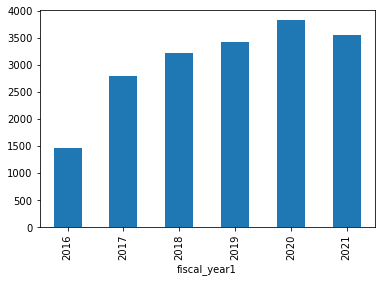

In [19]:
referral_by_year_bar.plot(x= 'child_id', y=['fiscal_year1'], kind = 'bar')

## Count of children with multiple referrals by POE

In [20]:
dups_count_df['child_id'].groupby(dups_count_df.POE).agg('count')

POE
ET    3324
FT    1828
GN    3440
MD    3145
NW    1088
SC    2146
SE    1072
SW     956
UC    1307
Name: child_id, dtype: int64

In [21]:
referral_by_poe_bar = dups_count_df['child_id'].groupby(dups_count_df.POE).agg('count')

<AxesSubplot:xlabel='POE'>

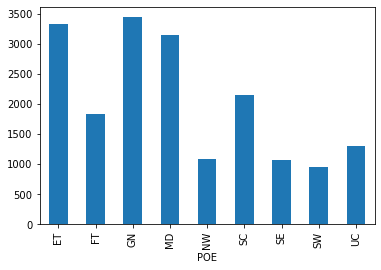

In [22]:
referral_by_poe_bar.plot(x= 'child_id', y=['POE'], kind = 'bar')

## END OF Q1